In [71]:
#!python

import numpy as np
from scipy import signal
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

import matplotlib.pyplot as plt

In [ ]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

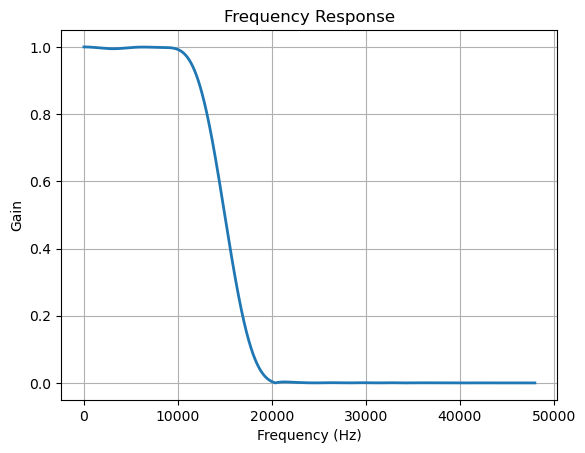

In [48]:
fs = 96000
oversample = 4
nyquist = fs / 2

taps = signal.firwin(32, cutoff=15000, window = 'hamming', fs=fs)
#taps = [0.25, 0.25, 0.25, 0.25]
w, h = signal.freqz(taps, worN=4092)

plot((w/pi)*fs/2, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)


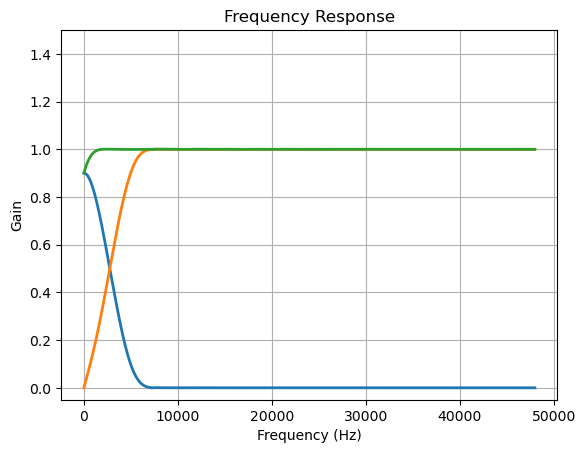

In [60]:
fs = 96000
oversample = 4
nyquist = fs / 2

#taps = signal.firwin2(150, [0.0, 0.5, 1.0], [1.0, 1.0, 0.0])
tapslp = signal.firwin2(64, [0.0, 500.0, 5000, fs/2], [1.0, 1.0,0.0, 0.0], fs=fs)
tapshp = signal.firwin2(64, [0.0, 500.0,5000.0, fs/2], [0.0, 0.0,1.0, 1.0], antisymmetric=True, fs=fs)
#taps = [0.25, 0.25, 0.25, 0.25]
wlp, hlp = signal.freqz(tapslp, worN=4092)
whp, hhp = signal.freqz(tapshp, worN=4092)

plot((wlp/pi)*fs/2, absolute(hlp), linewidth=2)
plot((whp/pi)*fs/2, absolute(hhp), linewidth=2)
plot((whp/pi)*fs/2, absolute(hhp)+absolute(hlp), linewidth=2)

xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.5)
grid(True)


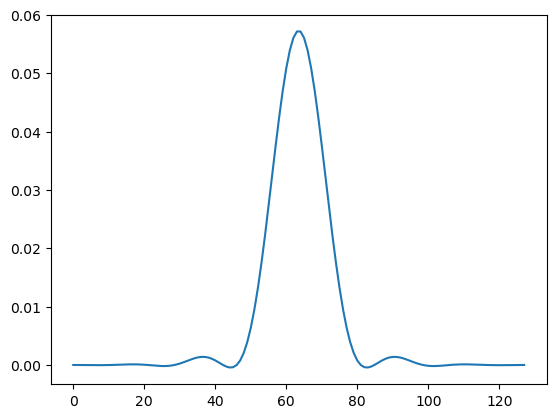

In [59]:
#plot(tapshp)
plot(tapslp)

(-60.0, 10.0)

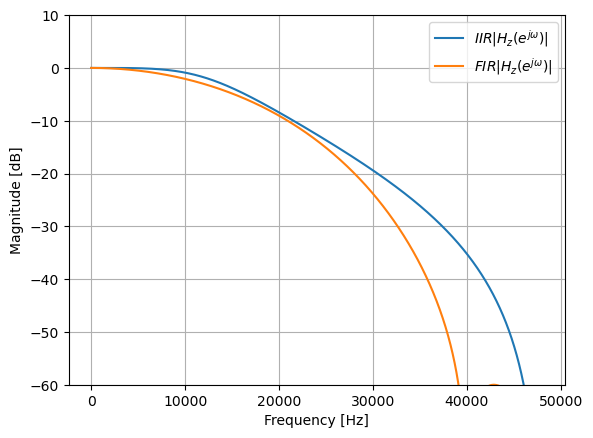

In [121]:
fs = 96000

fc = 15000

k = 1/(2*np.pi*fc)

#IIR
a, b = signal.bilinear([1], [k*k,np.sqrt(2)*k, 1], fs)
wz, hz = signal.freqz(a, b, worN=10000)

#FIR
taps = signal.firwin(8, cutoff=fc, window = 'hamming', fs=fs)
wf, hf = signal.freqz(taps, worN=10000)

plt.plot(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),

             label=r'$IIR |H_z(e^{j \omega})|$')

plt.plot(wf*fs/(2*np.pi), 20*np.log10(np.abs(hf).clip(1e-15)),

             label=r'$FIR |H_z(e^{j \omega})|$')

plt.legend()

plt.xlabel('Frequency [Hz]')

plt.ylabel('Magnitude [dB]')

plt.grid(True)

plt.ylim(-60, 10)

In [106]:
a

array([0.02127928, 0.04255855, 0.02127928])

In [107]:
b

array([ 1.        , -1.54704775,  0.63216486])